In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('COVID-19-time-series-clean-complete.csv')

data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [4]:

data['Date'] = pd.to_datetime(data['Date'])
data['DateYearMonth'] = data['Date'].map(lambda date: 100*date.year + date.month)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [5]:
# Part A


data_sub = data.groupby(['DateYearMonth','Country/Region'])['Confirmed'].sum().reset_index()
data_sub

,DateYearMonth,Country/Region,Confirmed
0,202001,Afghanistan,0
1,202001,Albania,0
2,202001,Algeria,0
3,202001,Andorra,0
4,202001,Angola,0
...,...,...,...
3855,202108,Vietnam,1053678
3856,202108,West Bank and Gaza,1903849
3857,202108,Yemen,42568
3858,202108,Zambia,1185287


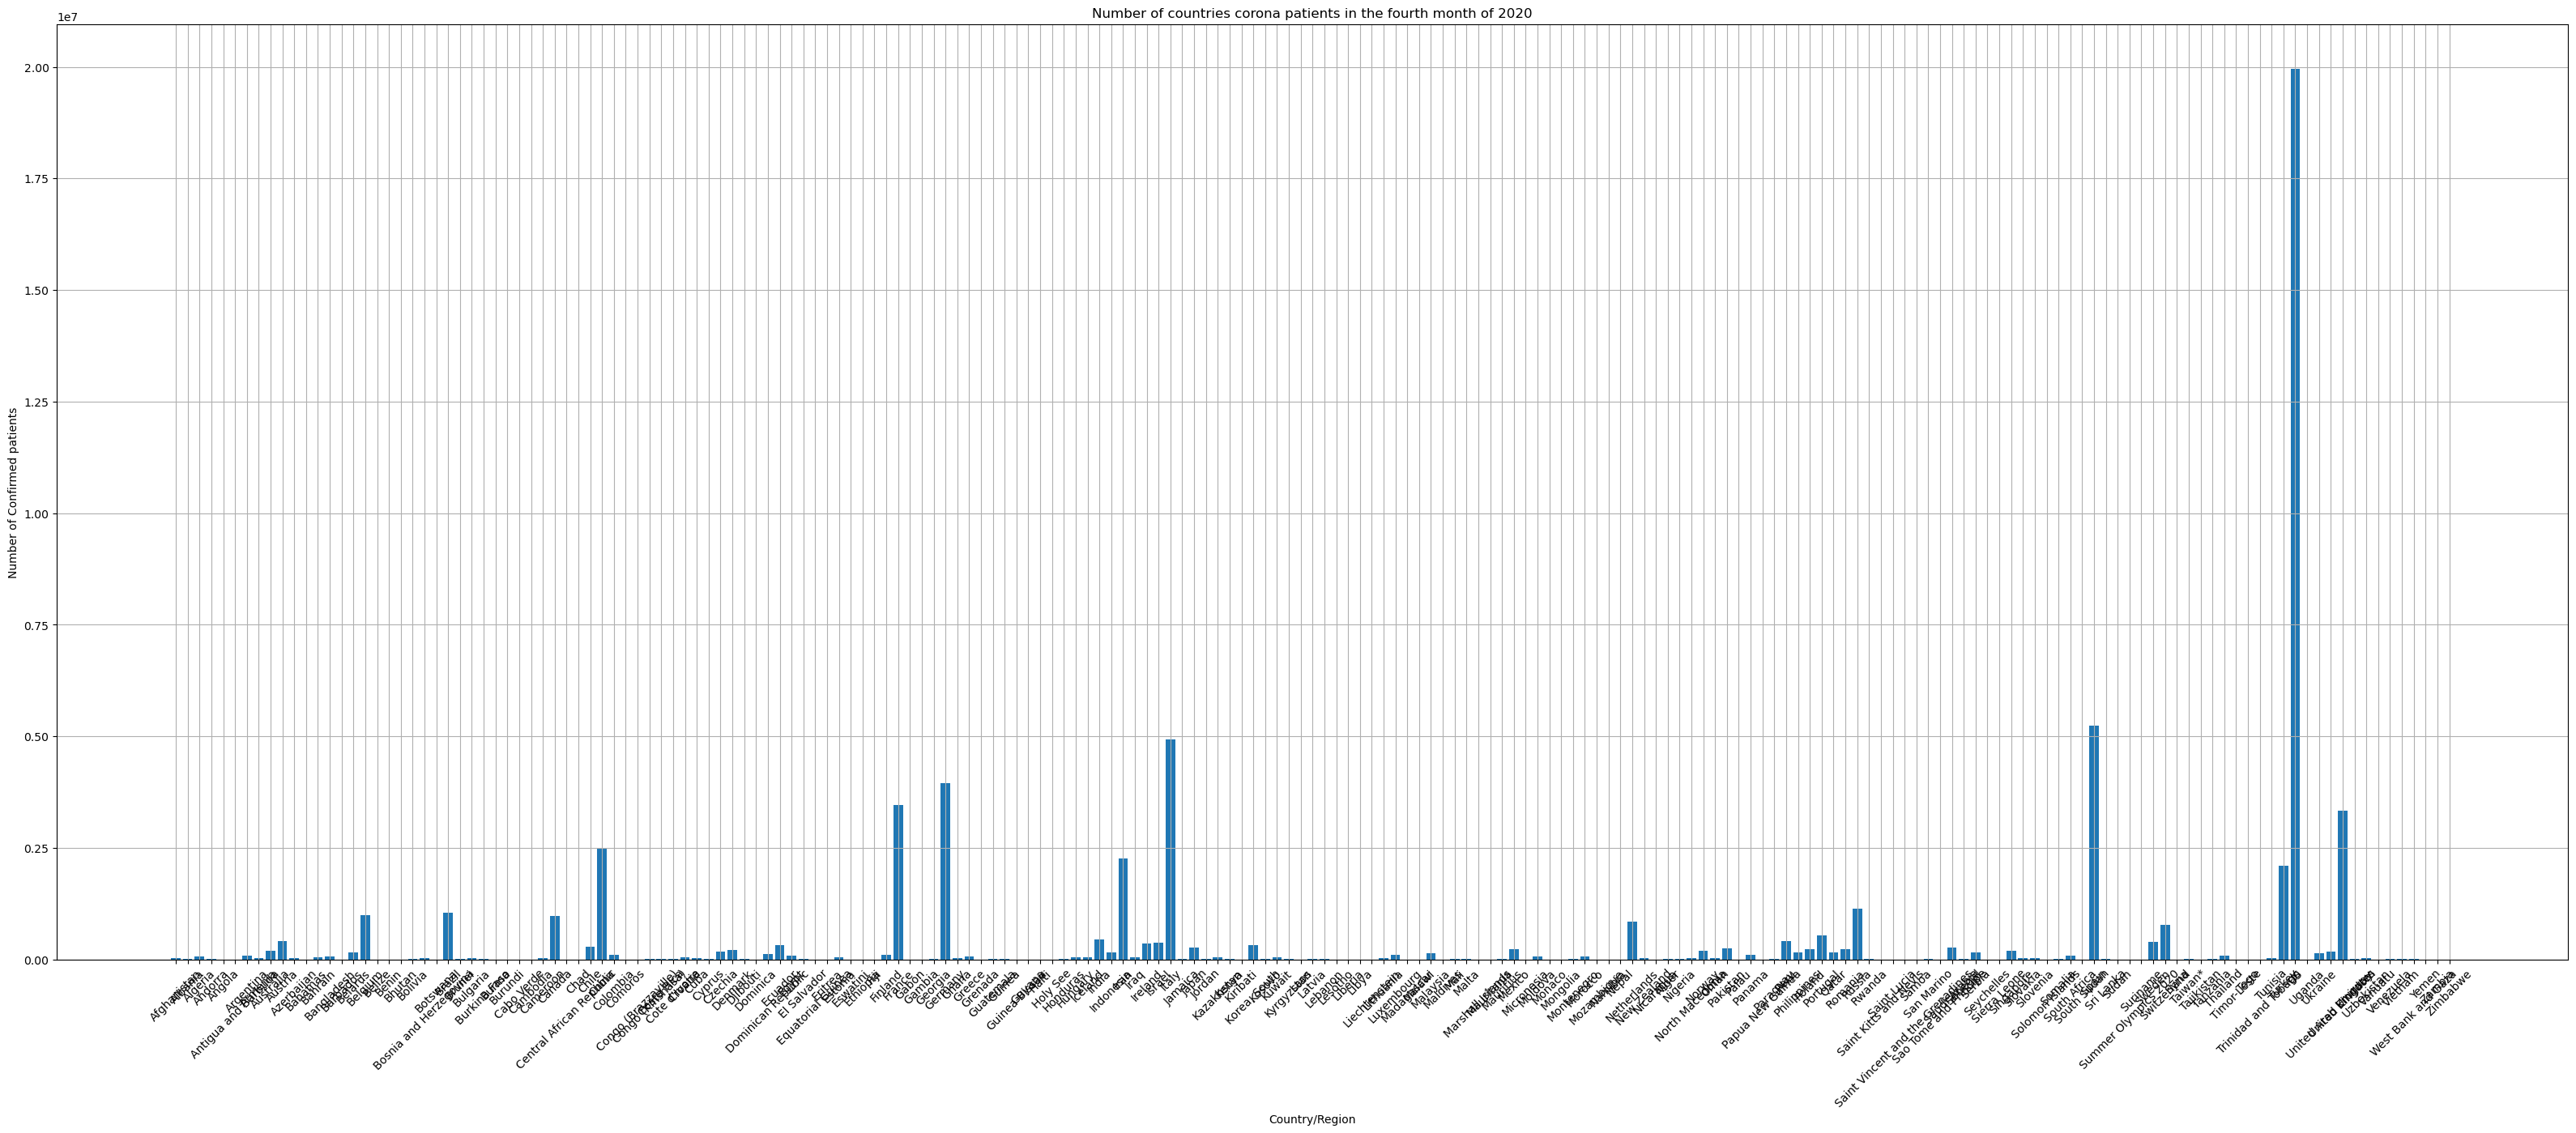

In [16]:
# plot all Number of countries corona patients in the fourth month of 2020
plt.figure(figsize=(40,15))
plt.bar(data_sub.query("DateYearMonth == 202004")['Country/Region'],
         data_sub.query("DateYearMonth == 202004")['Confirmed'])

plt.title('Number of countries corona patients in the fourth month of 2020')
plt.xlabel('Country/Region')
plt.ylabel('Number of Confirmed patients')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
April2020_data = data_sub.query('DateYearMonth == 202004')
data3 = April2020_data.nlargest(8, ['Confirmed'])
data3

,DateYearMonth,Country/Region,Confirmed
758,202004,US,19960815
741,202004,Spain,5236777
663,202004,Italy,4928524
644,202004,Germany,3942925
640,202004,France,3456319
762,202004,United Kingdom,3328344
615,202004,China,2500143
659,202004,Iran,2255837


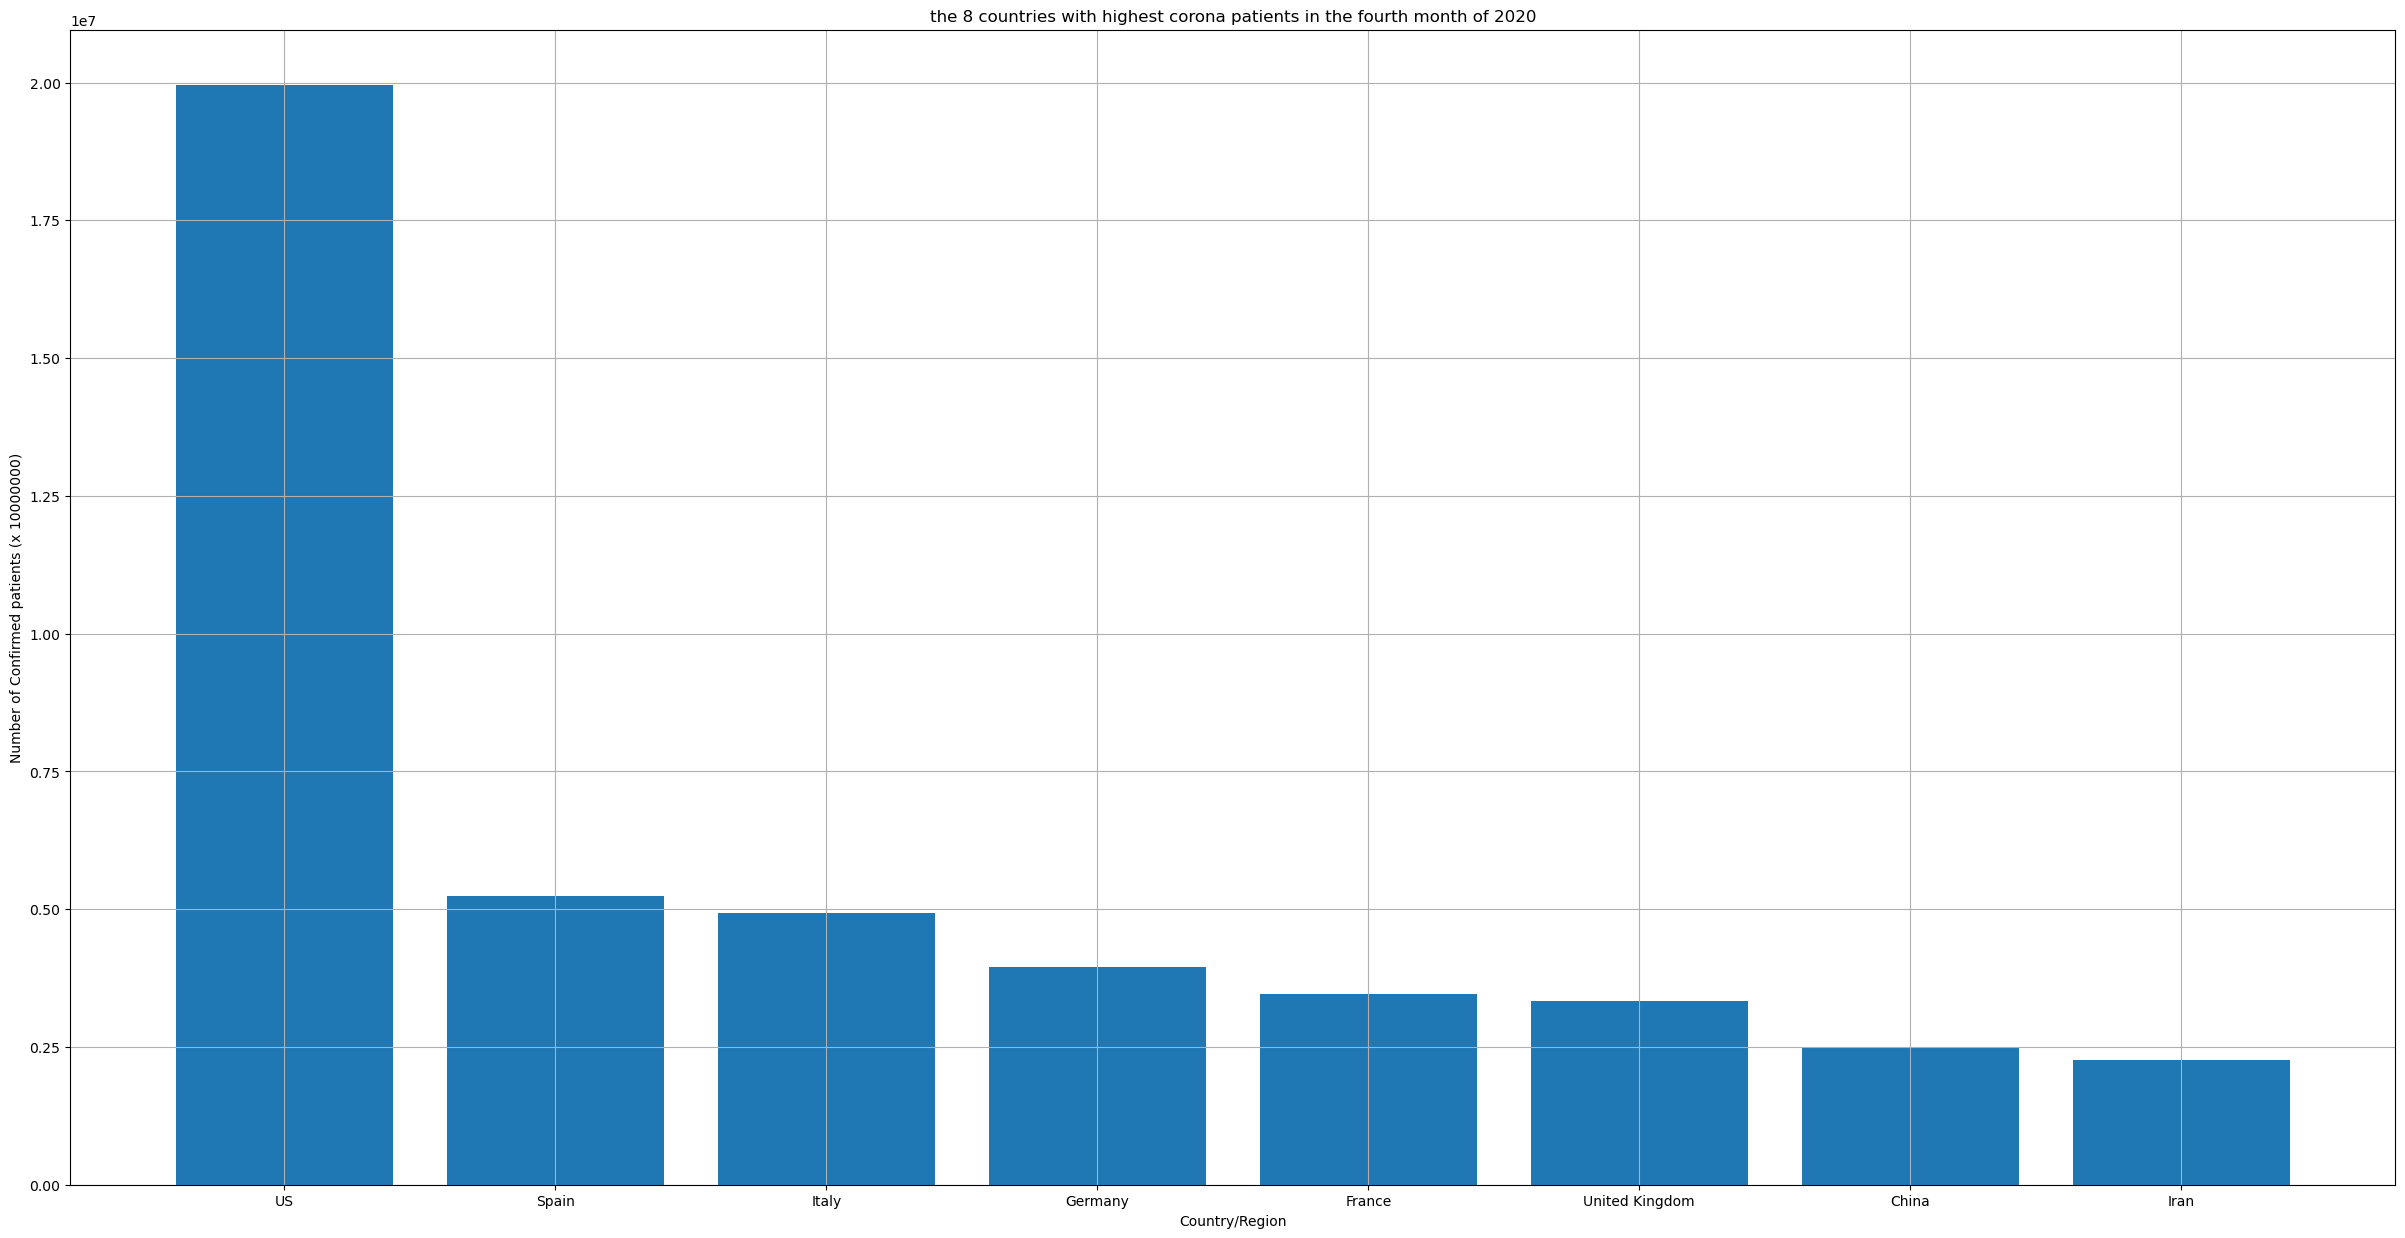

In [8]:
# plot all Number of countries corona patients in the fourth month of 2020
plt.figure(figsize=(30,15))
plt.bar(data3['Country/Region'],
         data3['Confirmed'])

plt.title('the 8 countries with highest corona patients in the fourth month of 2020')
plt.xlabel('Country/Region')
plt.ylabel('Number of Confirmed patients (x 10000000)')
plt.grid()
plt.show()



In [9]:

# Part B
Iran_data = data[data['Country/Region'] == 'Iran']
Iran_data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001
...,...,...,...,...,...,...,...,...,...,...,...
107774,107774,2021-08-02,Iran,3940708,91407,3404533.0,444768.0,37189,411,19338,202108
107967,107967,2021-08-03,Iran,3979727,91785,3424650.0,463292.0,39019,378,20117,202108
108160,108160,2021-08-04,Iran,4019084,92194,3444798.0,482092.0,39357,409,20148,202108
108353,108353,2021-08-05,Iran,4057758,92628,0.0,3965130.0,38674,434,-3444798,202108


In [10]:
# Iran new deaths in each month
IranNewDeaths = Iran_data.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()
IranNewDeaths

,DateYearMonth,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


In [11]:
# Iran deaths in each month
IranDeaths = Iran_data.groupby(['DateYearMonth'])['Deaths'].sum().reset_index()
IranDeaths

,DateYearMonth,Deaths
0,202001,0
1,202002,171
2,202003,34200
3,202004,141323
4,202005,215665
5,202006,273942
6,202007,424660
7,202008,604984
8,202009,711109
9,202010,934034


In [12]:
# so we know IranDeathRatio = IranNewDeaths / IranDeaths

#IranDeathRatio = Iran_data.groupby(['DateYearMonth'])['New deaths'].sum()\
#                 /Iran_data.groupby(['DateYearMonth'])['Deaths'].sum()
#IranDeathRatio = IranDeathRatio.reset_index()

#IranDeathRatio

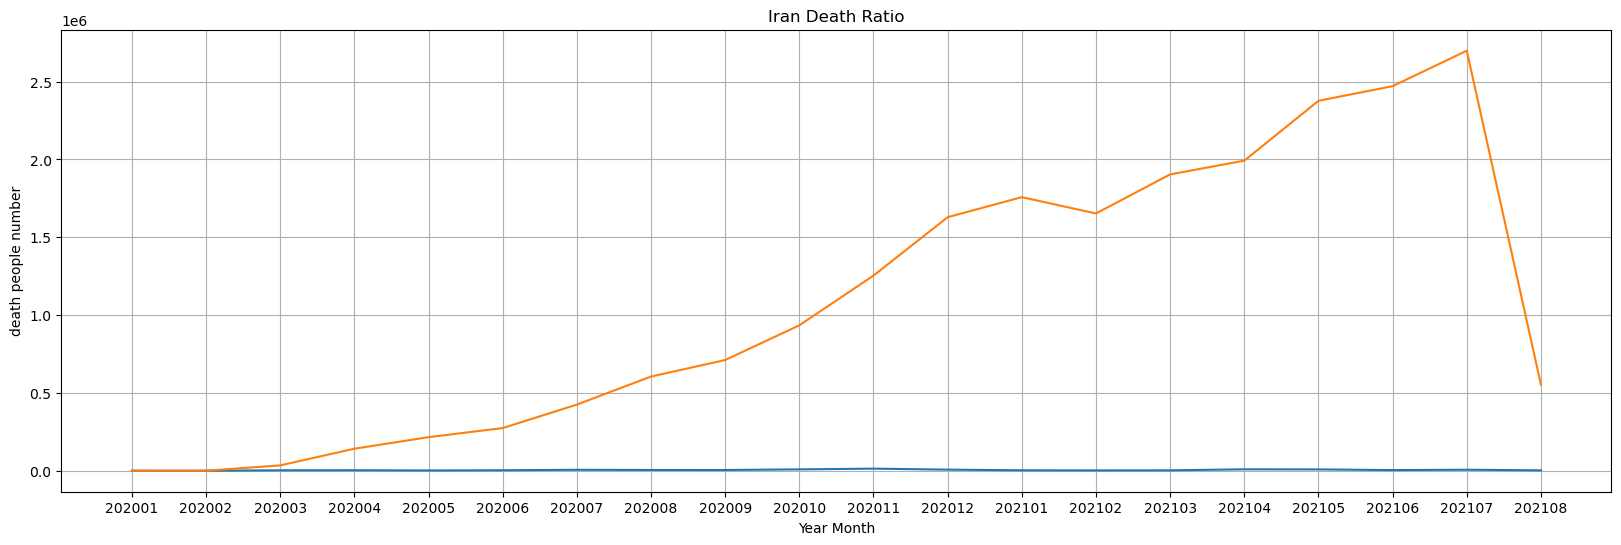

In [13]:
plt.figure(figsize=(20,6))
plt.plot(IranNewDeaths['DateYearMonth'].to_numpy(dtype=str),
         IranNewDeaths['New deaths'])

plt.plot(IranDeaths['DateYearMonth'].to_numpy(dtype=str),
         IranDeaths['Deaths'])

plt.title('Iran Death Ratio')
plt.xlabel('Year Month')
plt.ylabel('death people number')
plt.grid()
plt.show()